# Natural Computing

## Exercises on Evolutionary Computation (Assignment 1)

### Exercise 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# input dataset
X = np.array(['-1.0', '-0.9', '-0.8', '-0.7', '-0.6', '-0.5', '-0.4', '-0.3', '-0.2', '-0.1', 
     '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], dtype=float)
y = np.array(['0.0000', '-0.1629', '-0.2624', '-0.3129', '-0.3264', '-0.3125', '-0.2784', '-0.2289', '-0.1664', 
              '-0.0909', '0.0', ' 0.1111', '0.2496', '0.4251', '0.6496', '0.9375', '1.3056', '1.7731', '2.3616',
              '3.0951', '4.0000'], dtype=float)

In [3]:
X.shape, y.shape

((21,), (21,))

In [4]:
X.dtype, y.dtype

(dtype('float64'), dtype('float64'))

In [5]:
# define parameters
pop_size = 1000
gen_num = 50
cross_p = 0.7
mut_p = 0

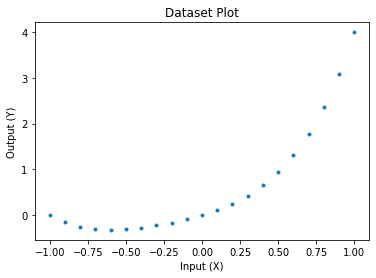

In [6]:
plt.figure()
plt.plot(X, y, '.')
plt.xlabel('Input (X)')
plt.ylabel('Output (Y)')
plt.title('Dataset Plot')
plt.show()

DEAP Framework

In [7]:
import operator
import math
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

In [8]:
# Define new functions
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)

In [9]:
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
# pset.addPrimitive(math.log1p, 1)
# pset.addPrimitive(math.exp, 1)
# pset.addPrimitive(math.sin, 1)
# pset.addPrimitive(math.cos, 1)
pset.addPrimitive(protectedDiv, 2)
pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
pset.renameArguments(ARG0='x')

In [10]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

In [11]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

In [12]:
def evalSymbReg(individual, points):
    '''function to evaluate the symbolic regression'''
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    
    # Evaluate the mean squared error between the expression
    # and the real function : x**4 + x**3 + x**2 + x
    
#     sqerrors = ((func(x) - x**4 - x**3 - x**2 - x)**2 for x in points)
#     return math.fsum(sqerrors) / len(points)

#     est_y = np.array([func(x) for x,_ in points])
#     y = np.array([y for _,y in points])
    errors = (abs(func(x) - y) for x,y in points)
    mae = math.fsum(errors)
    return mae,

In [13]:
data = [(X[i], y[i]) for i in range(X.size)]

In [14]:
# toolbox.register("evaluate", evalSymbReg, points=[x/10. for x in range(-10,10)])
toolbox.register("evaluate", evalSymbReg, points=data)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

In [15]:
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

In [16]:
random.seed(318)

pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(1)

stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

# pop, log = algorithms.eaSimple(pop, toolbox, 0.5, 0.1, 40, stats=mstats,
#                                    halloffame=hof, verbose=True)
pop, log = algorithms.eaSimple(population=pop, toolbox=toolbox, cxpb=cross_p,
                               mutpb=mut_p, ngen=gen_num, stats=mstats,
                               halloffame=hof, verbose=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
<string>:1: RuntimeWarning: invalid value encountered in double_scalars


   	      	                  fitness                  	                      size                     
   	      	-------------------------------------------	-----------------------------------------------
gen	nevals	avg	gen	max	min	nevals	std	avg  	gen	max	min	nevals	std    
0  	1000  	nan	0  	nan	nan	1000  	nan	4.642	0  	7  	3  	1000  	1.85144
1  	710   	nan	1  	nan	nan	710   	nan	4.484	1  	9  	3  	710   	1.78374
2  	700   	nan	2  	nan	nan	700   	nan	4.314	2  	11 	3  	700   	1.63138
3  	720   	nan	3  	nan	nan	720   	nan	4.362	3  	11 	3  	720   	1.6748 
4  	676   	nan	4  	nan	nan	676   	nan	4.362	4  	11 	3  	676   	1.63124
5  	674   	nan	5  	nan	nan	674   	nan	4.518	5  	13 	3  	674   	1.68869
6  	682   	nan	6  	nan	nan	682   	nan	4.75 	6  	11 	3  	682   	1.70103
7  	690   	nan	7  	nan	nan	690   	nan	5.08 	7  	11 	3  	690   	1.78482
8  	718   	nan	8  	nan	nan	718   	nan	5.298	8  	15 	3  	718   	1.83826
9  	704   	nan	9  	nan	nan	704   	nan	5.576	9  	15 	3  	704   	2.00305
10 	674   	na

In [27]:
fit_mins = log.chapters["fitness"].select("min")
size_avgs = log.chapters["size"].select("avg")

[{'avg': nan, 'std': nan, 'min': nan, 'max': nan, 'gen': 0, 'nevals': 1000},
 {'avg': nan, 'std': nan, 'min': nan, 'max': nan, 'gen': 1, 'nevals': 710},
 {'avg': nan, 'std': nan, 'min': nan, 'max': nan, 'gen': 2, 'nevals': 700},
 {'avg': nan, 'std': nan, 'min': nan, 'max': nan, 'gen': 3, 'nevals': 720},
 {'avg': nan, 'std': nan, 'min': nan, 'max': nan, 'gen': 4, 'nevals': 676},
 {'avg': nan, 'std': nan, 'min': nan, 'max': nan, 'gen': 5, 'nevals': 674},
 {'avg': nan, 'std': nan, 'min': nan, 'max': nan, 'gen': 6, 'nevals': 682},
 {'avg': nan, 'std': nan, 'min': nan, 'max': nan, 'gen': 7, 'nevals': 690},
 {'avg': nan, 'std': nan, 'min': nan, 'max': nan, 'gen': 8, 'nevals': 718},
 {'avg': nan, 'std': nan, 'min': nan, 'max': nan, 'gen': 9, 'nevals': 704},
 {'avg': nan, 'std': nan, 'min': nan, 'max': nan, 'gen': 10, 'nevals': 674},
 {'avg': nan, 'std': nan, 'min': nan, 'max': nan, 'gen': 11, 'nevals': 700},
 {'avg': nan, 'std': nan, 'min': nan, 'max': nan, 'gen': 12, 'nevals': 722},
 {'avg':